In [1]:
import sys, os, time
import shutil
%pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

Automatic pdb calling has been turned ON


In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 146 runs
Auto parsing failed with: test-cmd_200201-144619
Auto parsing failed with: test-cmd_200201-144801


In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [9]:
M.clear_filters().filter_strs('!test')


M.filter_jobs(47)
# M.filter_models('ae')
# M.filter_datasets('3dshapes')
# M.filter(lambda r: 'n/adain-dec' in r.config.info.history or 'n/adain-large' in r.config.info.history)
# M.filter_models('wgan')

M.filter_datasets('box-s1')

# M.filter_min(ckpt=16)

# M.filter_checkpoints(60)

# M.load_configs(60)

# M.load_configs(100)

M.sort_by('date').sort_by('job')
pass
M.show()


  0) box-s1-ae_0047-6049598-01_200201-051024
  1) box-s1-wae_0047-6049598-02_200201-050901
  2) box-s1-vae_0047-6049598-03_200201-050901
  3) box-s1-vae_0047-6049598-04_200201-051000
  4) box-s1-fae_0047-6049598-05_200201-051332
  5) box-s1-fwae_0047-6049598-06_200201-051258
  6) box-s1-fvae_0047-6049598-07_200201-051256


In [7]:
# M.prep_info(100)
M.prep_info()
# M.load_records(tqdm)

Selecting checkpoint: last


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Loaded configs


In [8]:
M.show('ckpt')

  0) box-s1-ae_0047-6049598-01_200201-051024
	Checkpoint: 26 (approx 52000 steps)

  1) box-s1-wae_0047-6049598-02_200201-050901
	Checkpoint: 26 (approx 52000 steps)

  2) box-s1-vae_0047-6049598-03_200201-050901
	Checkpoint: 26 (approx 52000 steps)

  3) box-s1-vae_0047-6049598-04_200201-051000
	Checkpoint: 26 (approx 52000 steps)

  4) box-s1-fae_0047-6049598-05_200201-051332
	Checkpoint: 26 (approx 52000 steps)

  5) box-s1-fwae_0047-6049598-06_200201-051258
	Checkpoint: 26 (approx 52000 steps)

  6) box-s1-fvae_0047-6049598-07_200201-051256
	Checkpoint: 26 (approx 52000 steps)

  7) box-s1-dae_0048-6049648-09_200201-132523
	Checkpoint: 18 (approx 36000 steps)

  8) box-s1-ae_0049-6049677-01_200201-144905
	Checkpoint: 26 (approx 52000 steps)

  9) box-s1-wae_0049-6049677-02_200201-144902
	Checkpoint: 26 (approx 52000 steps)

 10) box-s1-vae_0049-6049677-03_200201-144903
	Checkpoint: 26 (approx 52000 steps)

 11) box-s1-vae_0049-6049677-04_200201-144904
	Checkpoint: 26 (approx 52000 

In [10]:
M.clear_run_cache()

In [11]:
# M.sort_by('job')
# print('\n'.join('unbuffer python main_eval.py --legacy 0 --resume {}'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
print('\n'.join('unbuffer python hybrid.py n/t/box-s2 --load {}'.format(n) for n in M.through().name))


unbuffer python hybrid.py n/t/box-s2 --load box-s1-ae_0047-6049598-01_200201-051024
unbuffer python hybrid.py n/t/box-s2 --load box-s1-wae_0047-6049598-02_200201-050901
unbuffer python hybrid.py n/t/box-s2 --load box-s1-vae_0047-6049598-03_200201-050901
unbuffer python hybrid.py n/t/box-s2 --load box-s1-vae_0047-6049598-04_200201-051000
unbuffer python hybrid.py n/t/box-s2 --load box-s1-fae_0047-6049598-05_200201-051332
unbuffer python hybrid.py n/t/box-s2 --load box-s1-fwae_0047-6049598-06_200201-051258
unbuffer python hybrid.py n/t/box-s2 --load box-s1-fvae_0047-6049598-07_200201-051256


In [11]:
run = M[1]
run.name

'3dshapes-vae_0035-6048636-04_200131-185348'

In [12]:
M.clear_run_cache()

In [13]:
S = run.reset()

In [14]:
# S.A = train.get_config()
# S.A.dataset.name = '3dshapes'
# S.A.dataset.kwargs = {}

In [15]:
# S.bounds = -2,2
run.load(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-vae_0035-6048636-04_200131-185348/checkpoint_1.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-vae_0035-6048636-04_200131-185348/checkpoint_1.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
dataroot: /is/ei/fleeb/workspace/local_data (in parent)
load_memory: True (by default)
train: True
labeled: False (by default)
noise: None (by default)
din: (3, 64, 64) (by default)
dout: (3, 64, 64) (by default)
Dataset moved to cpu
Model-type: vpp
Creating encoder (type=double-enc) (mod=normal)
  latent_dim: 12 (in parent)
  min_log_std: None (by default)
  in_shape --> din: (3, 64, 64) (in parent)
  channels: [64, 64, 64, 128, 128] (in parent)
  factors: 2 (in parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 24
  Creating tail (type=mlp)
    input_dim --> din: (128, 

In [16]:

run.run(pbar=tqdm)

Using batched data loader


/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Using 1000 samples
Using batched data loader



Storing 38400 latent vectors


In [17]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-vae_0035-6048636-04_200131-185348/checkpoint_1.pth.tar'

In [18]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


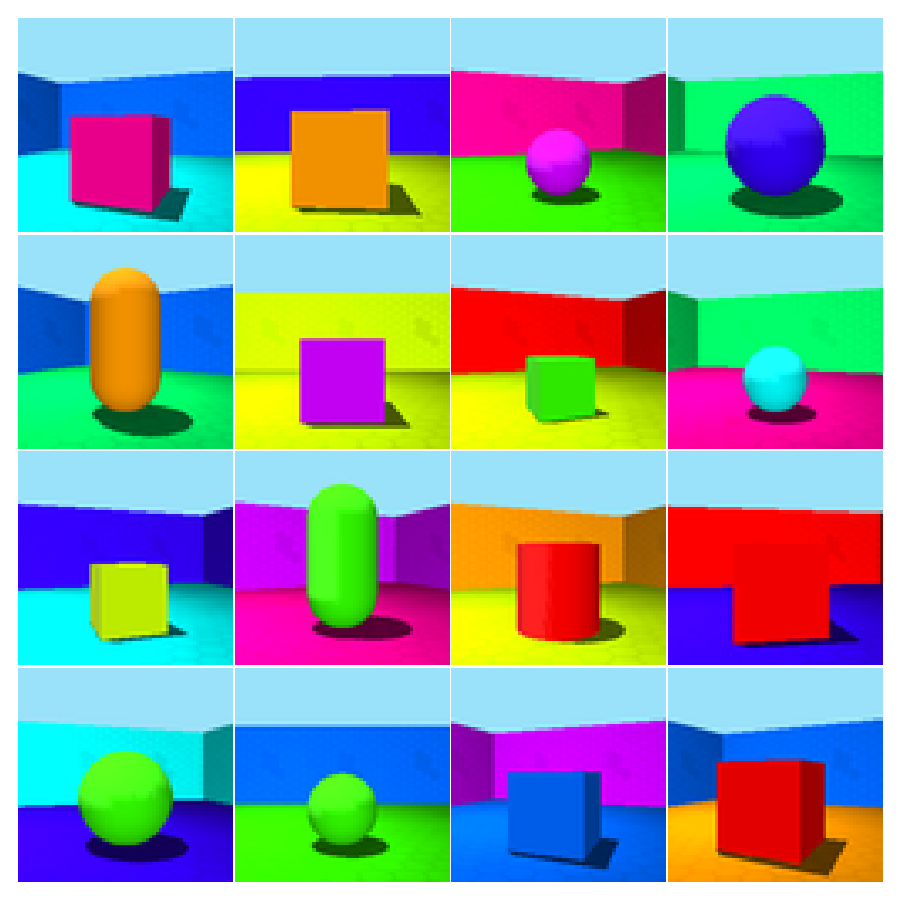

In [19]:
viz['original'][0].view(scale=2)

<IPython.core.display.Javascript object>


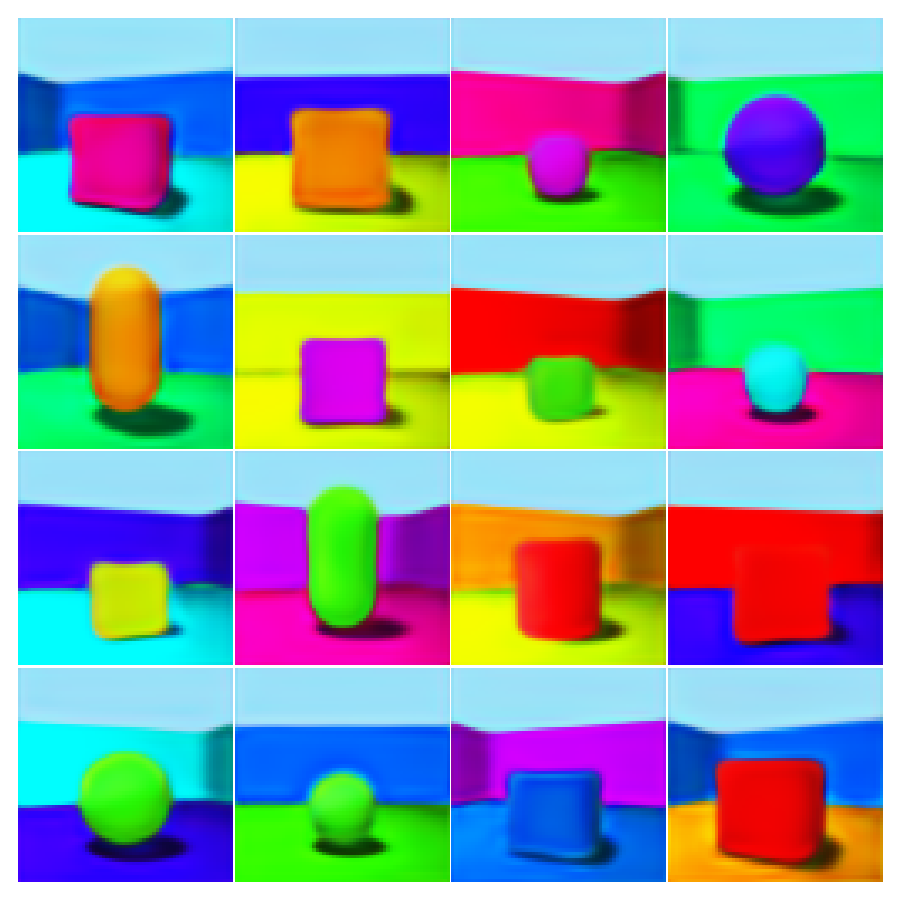

In [20]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


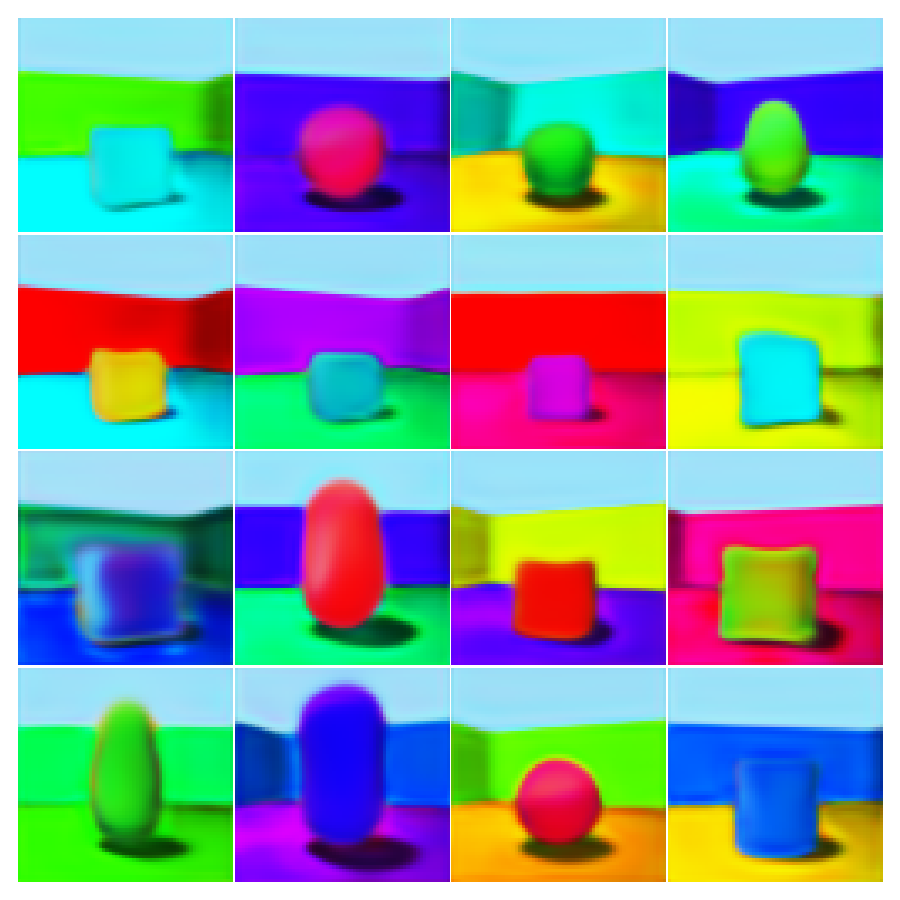

In [21]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


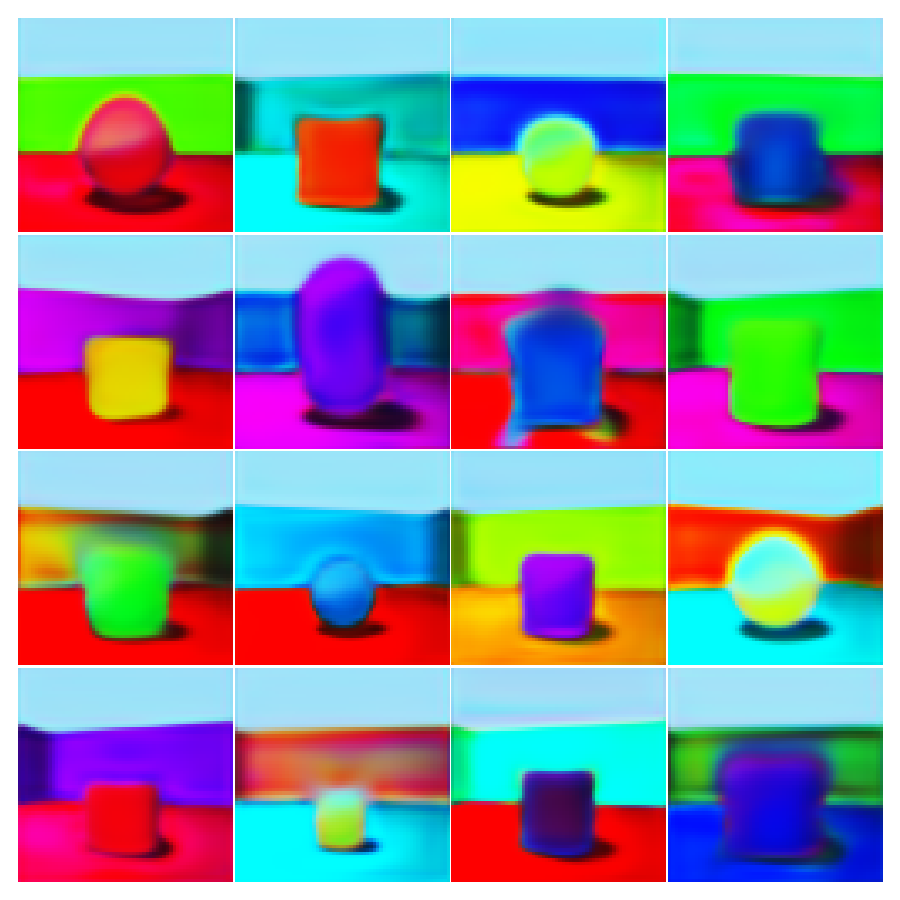

In [22]:
viz['gens'][0].view(scale=2)

In [23]:
viz['traversals'][2].view(scale=2)

<IPython.core.display.Javascript object>


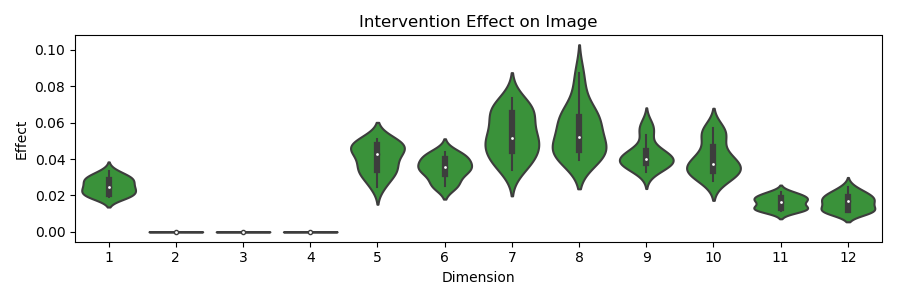

In [24]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


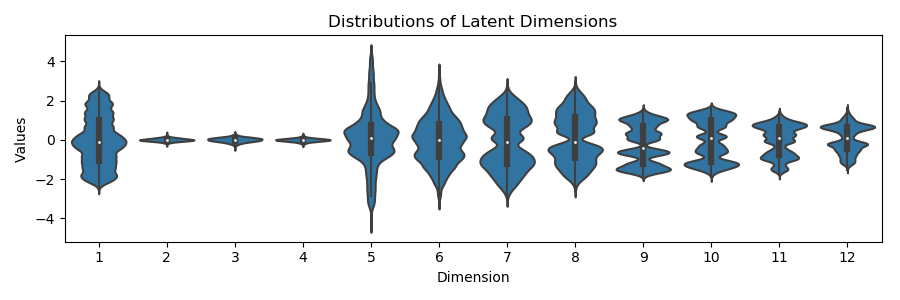

In [25]:
fig = viz['latent'][0].view(scale=2)
# # plt.figure(fig.number)
# # ax = fig.get_axes()[0]
# # ax.set_ylim(-3, 3)
fig

In [25]:
# evals = run.evaluate(pbar=tqdm)

In [26]:
# update_checkpoint(S, 'evals', overwrite=True)

In [27]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [28]:
run.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-ae_0007-6027503-02_200129-124609/checkpoint_20.pth.tar'

In [29]:
run.meta.history

['n/wae',
 'n/adain-dec',
 'n/3dshapes',
 'n/basics',
 'n/double',
 'n/basics',
 'base']

In [47]:
print(run.state.model)

Wasserstein_PP(
  (enc): Double_Encoder(
    (layers): ModuleList(
      (0): DoubleConvLayer(
        residual=False
        (conv): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
        (down): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (norm): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (out_nonlin): ELU(alpha=1.0, inplace=True)
      )
      (1): DoubleConvLayer(
        residual=False
        (conv): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
        (down): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (norm): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=Fals

In [31]:
# S.keys()

In [32]:
# S.hello = 'world'

In [33]:
# update_checkpoint(S, 'hello')

In [34]:
# viz_

In [35]:
# S.fid_gen_stats.keys()

In [36]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [37]:
# import pickle

In [38]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [39]:
# f

In [40]:
# run.state.keys()

In [41]:
# model = run.state.model

In [42]:
# q = run.state.q
# q.shape

In [43]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [44]:
# show_nums(imgs)

In [45]:
media_root = '/is/ei/fleeb/workspace/media/hybrid/viewing/'
run.save(media_root)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/viewing/3dshapes-ae_0007-6027503-02_200129-124609_ckpt20
	Model saved
	Config saved
	Visualization saved
	Evaluation saved
	Results saved: val_Q


'/is/ei/fleeb/workspace/media/hybrid/viewing/3dshapes-ae_0007-6027503-02_200129-124609_ckpt20'